In [4]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('../data/*.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error

traintypes = {'fare_amount': 'float32',
     'pickup_datetime': 'str', 
     'pickup_longitude': 'float32',
     'pickup_latitude': 'float32',
     'dropoff_longitude': 'float32',
     'dropoff_latitude': 'float32',
     'passenger_count': 'uint8'}

X_train_full = pd.read_csv("../data/train.csv", usecols=list(traintypes.keys()), dtype=traintypes)
X_test_full = pd.read_csv("../data/test.csv")

In [18]:
X_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   fare_amount        float32
 1   pickup_datetime    object 
 2   pickup_longitude   float32
 3   pickup_latitude    float32
 4   dropoff_longitude  float32
 5   dropoff_latitude   float32
 6   passenger_count    uint8  
dtypes: float32(5), object(1), uint8(1)
memory usage: 1.5+ GB


In [19]:
X_train_full.dropna(how='any', axis='rows', inplace=True)

In [20]:
X_train_full.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542348e+07,5.542348e+07,5.542348e+07,5.542348e+07,5.542348e+07,5.542348e+07
mean,1.134501e+01,-7.250986e+01,3.991980e+01,-7.251120e+01,3.992071e+01,1.685391e+00
std,2.071087e+01,1.284877e+01,9.642324e+00,1.278220e+01,9.633346e+00,1.327662e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396368e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


In [29]:
X_train_filtered = X_train_full[(X_train_full['fare_amount'] > 0) & (X_train_full['passenger_count'] > 0)]

In [34]:
X_train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55224625 entries, 0 to 55423855
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   fare_amount        float32
 1   pickup_datetime    object 
 2   pickup_longitude   float32
 3   pickup_latitude    float32
 4   dropoff_longitude  float32
 5   dropoff_latitude   float32
 6   passenger_count    uint8  
dtypes: float32(5), object(1), uint8(1)
memory usage: 1.9+ GB


In [35]:
X_train_filtered.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844315,40.721317,-73.841614,40.712276,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016045,40.711304,-73.979271,40.782005,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982735,40.761269,-73.991241,40.750561,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987129,40.733143,-73.991570,40.758091,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968094,40.768009,-73.956657,40.783764,1


In [71]:
X_train_featured = X_train_filtered.copy()
X_train_featured['year'] = X_train_filtered['pickup_datetime'].apply(lambda x: (int)(x.split()[0].split('-')[0]))
X_train_featured['month'] = X_train_filtered['pickup_datetime'].apply(lambda x: (int)(x.split()[0].split('-')[1]))



In [131]:
X_train_featured['time'] = X_train_filtered['pickup_datetime'].apply(lambda x: "day" if (int)(x.split()[1].split(':')[0]) > 6 and (int)(x.split()[1].split(':')[0]) < 23 else "night")



In [132]:
X_train_featured["manhattan_dist"] = abs(X_train_filtered['pickup_latitude'] - X_train_filtered['dropoff_latitude']) + abs(X_train_filtered['pickup_longitude'] - X_train_filtered['dropoff_longitude'])




In [133]:
# X_train_featured["euclidean_dist"] = pow(X_train_filtered['pickup_latitude'] - X_train_filtered['dropoff_latitude'], 2) + pow(X_train_filtered['pickup_longitude'] - X_train_filtered['dropoff_longitude'], 2)



In [139]:
X_train_featured_new = X_train_featured.drop(['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis =1)




In [140]:
X_train_featured_new['fare_amount'] = X_train_featured_new['fare_amount'] / X_train_featured_new['passenger_count']
X_train_featured_new['passenger_count'] = X_train_featured_new['passenger_count'] / X_train_featured_new['passenger_count']

X_train_featured_new = X_train_featured_new.astype({"year": 'int32', "month": 'int32', "passenger_count": 'int32'})



In [141]:
X_train_featured_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55224625 entries, 0 to 55423855
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   fare_amount      float32
 1   passenger_count  int32  
 2   year             int32  
 3   month            int32  
 4   time             object 
 5   manhattan_dist   float32
 6   euclidean_dist   float32
dtypes: float32(3), int32(3), object(1)
memory usage: 2.1+ GB


In [142]:
X_train_featured_new.describe()

,fare_amount,passenger_count,year,month,manhattan_dist,euclidean_dist
count,5.522462e+07,55224625.0,5.522462e+07,5.522462e+07,5.522462e+07,5.522462e+07
mean,9.097874e+00,1.0,2.011741e+03,6.267963e+00,3.197532e-01,1.780486e+02
std,1.719363e+01,0.0,1.862800e+00,3.435155e+00,1.655455e+01,6.136995e+04
min,1.666667e-03,1.0,2.009000e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.100000e+00,1.0,2.010000e+03,3.000000e+00,1.582336e-02,1.535698e-04
50%,6.900000e+00,1.0,2.012000e+03,6.000000e+00,2.764130e-02,4.597011e-04
75%,1.050000e+01,1.0,2.013000e+03,9.000000e+00,5.036545e-02,1.471383e-03
max,7.574702e+04,1.0,2.015000e+03,1.200000e+01,1.131478e+04,6.462674e+07


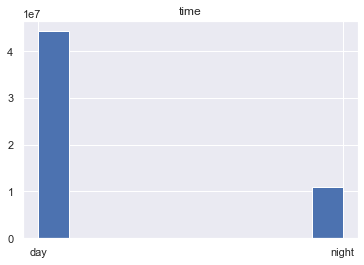

In [81]:
plt.hist(X_train_featured_new["time"])
plt.title("time")
plt.show()

In [119]:
X_train_sampled = X_train_featured_new.sample(frac=0.1, replace=False, random_state=42)

In [120]:
X_train_sampled = X_train_sampled[(X_train_sampled['passenger_count'] < 10)]
# X_train_sampled2 = X_train_sampled.copy()
# X_train_sampled2['fare_amount'] = X_train_sampled['fare_amount'] / X_train_sampled['passenger_count']
# X_train_sampled2['passenger_count'] = 1

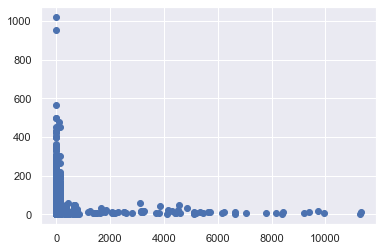

In [121]:
plt.scatter(X_train_sampled.manhattan_dist, X_train_sampled.fare_amount)

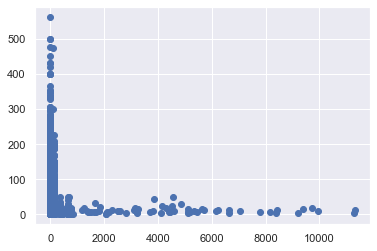

In [122]:
plt.scatter(X_train_sampled2.manhattan_dist, X_train_sampled2.fare_amount)